<a href="https://colab.research.google.com/github/fatemehes75/Classification_problems/blob/main/Drug_Selection_with_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

We have a dataset about a set of patients with same illness. During treatment, each patient responded to one of 5 drugs, Drug A, Drug B, Drug c, Drug x and y.

We want to to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients.


## Steps:
1. Choose features from DS
2. Calculate the importance of features after splitting dataset (Calculating IG)
3. Split data based on IG 
4. repeat step 2

** IG = Information gain that increases after splitting 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [2]:
df = pd.read_csv("drug200.csv")
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [8]:
x = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values
print(x[0:5])
print(y[0:5])

[[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.114]
 [28 'F' 'NORMAL' 'HIGH' 7.798]
 [61 'F' 'LOW' 'HIGH' 18.043]]
['drugY' 'drugC' 'drugC' 'drugX' 'drugY']


In [9]:
#Data_preprocessing 
#CConverting categorical values to numerical values

from sklearn import preprocessing
df_sex = preprocessing.LabelEncoder()
df_sex.fit(['F','M'])
x[:,1] = df_sex.transform(x[:,1]) 


df_BP = preprocessing.LabelEncoder()
df_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
x[:,2] = df_BP.transform(x[:,2])


df_Chol = preprocessing.LabelEncoder()
df_Chol.fit([ 'NORMAL', 'HIGH'])
x[:,3] = df_Chol.transform(x[:,3]) 

x[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [10]:
y[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

In [13]:
#splitting train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
#train the model
from sklearn.tree import DecisionTreeClassifier
class_tree =  DecisionTreeClassifier(criterion="entropy", max_depth = 4)
class_tree.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [15]:
Predicted_y = class_tree.predict(x_test)
print(Predicted_y [0:5])
print(y_test [0:5])

['drugX' 'drugY' 'drugX' 'drugC' 'drugY']
['drugX' 'drugY' 'drugX' 'drugC' 'drugY']


In [18]:
#Elavuation 
from sklearn import metrics
print("DecisionTree Accuracy: ", metrics.accuracy_score(y_test, Predicted_y))

DecisionTree Accuracy:  1.0


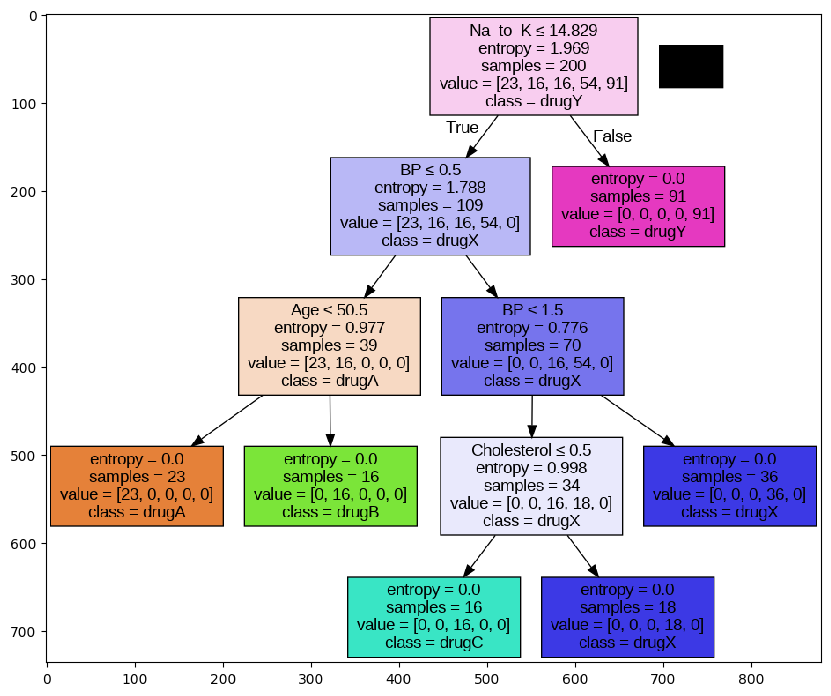

In [23]:
#Visiulization 
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
out=tree.export_graphviz(class_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(10, 20))
plt.imshow(img,interpolation='nearest')